In [1]:
import pandas as pd
import numpy as np
import covid.covidtracking as covidtracking
import matplotlib.pyplot as plt

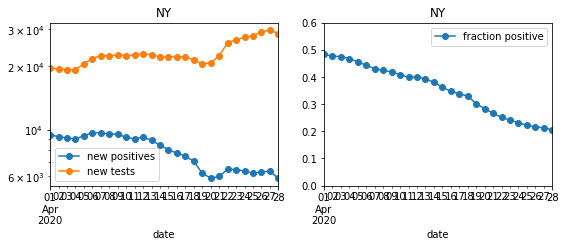

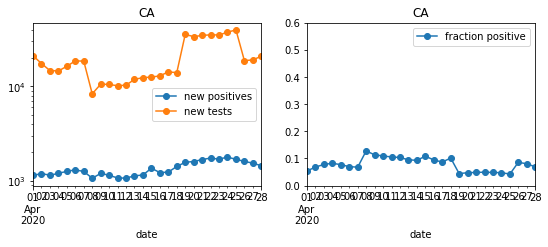

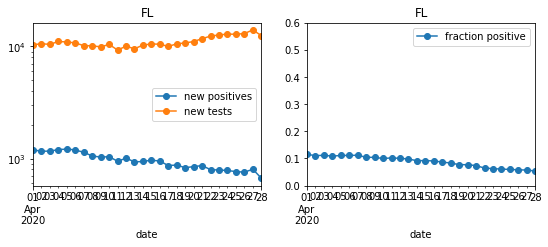

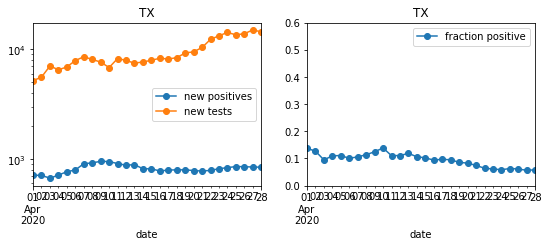

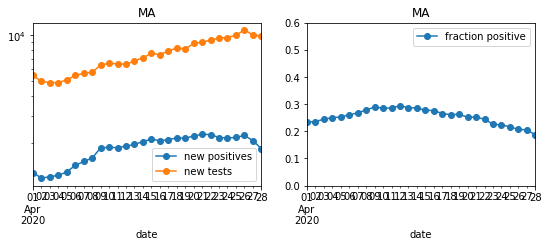

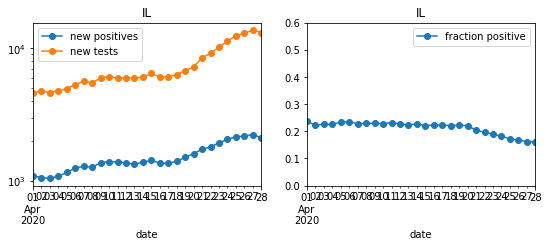

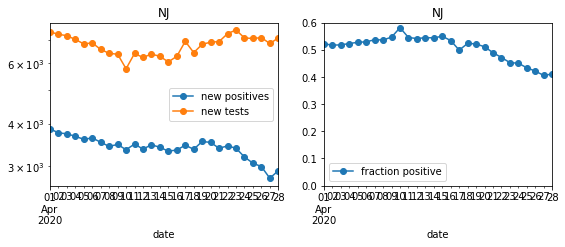

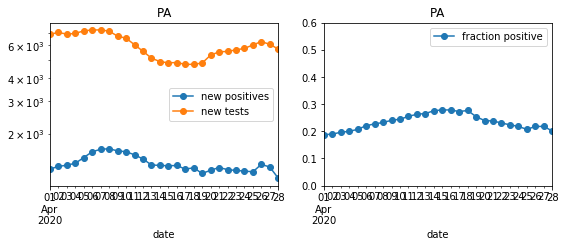

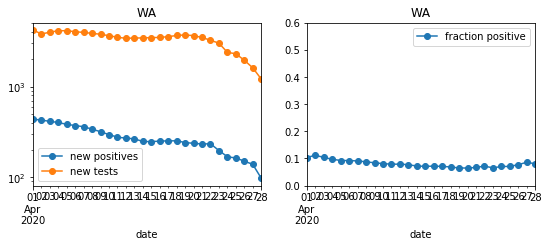

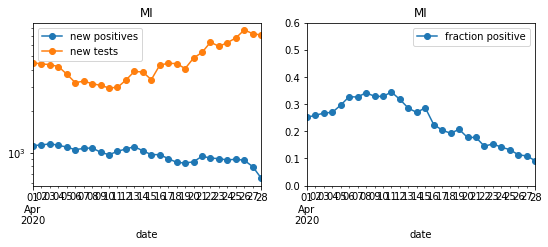

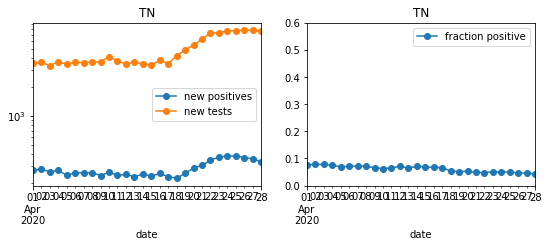

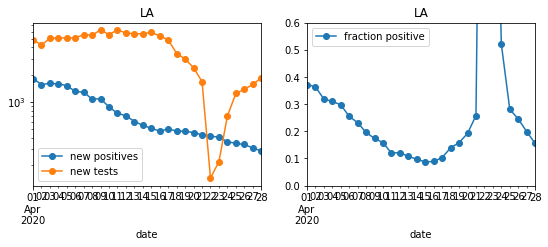

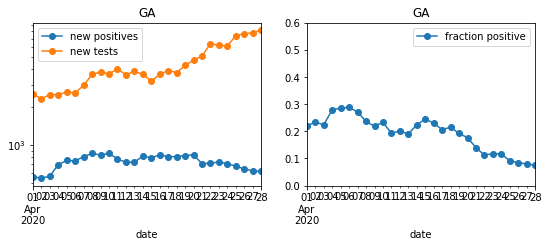

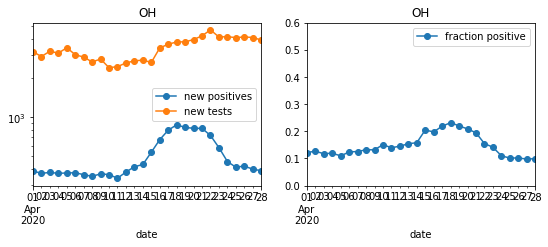

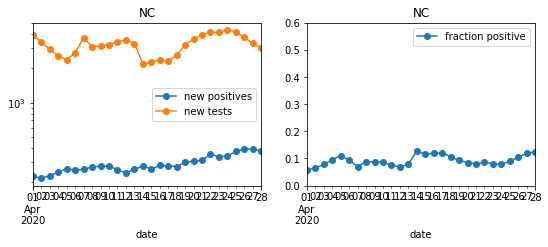

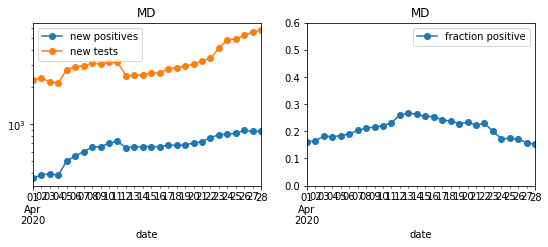

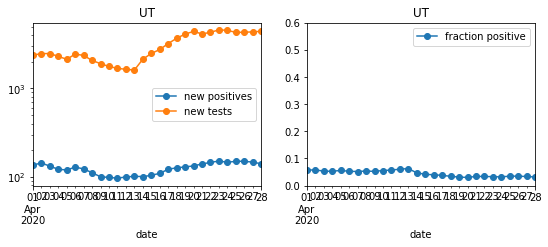

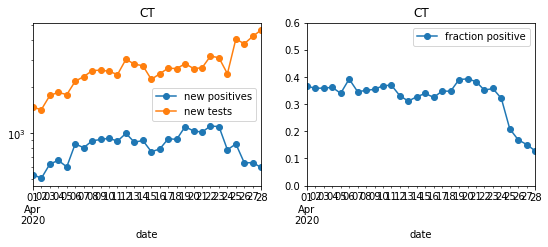

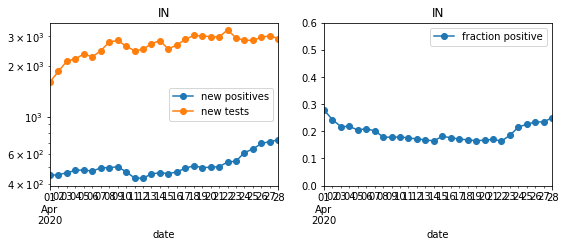

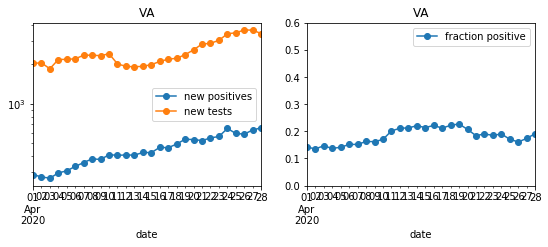

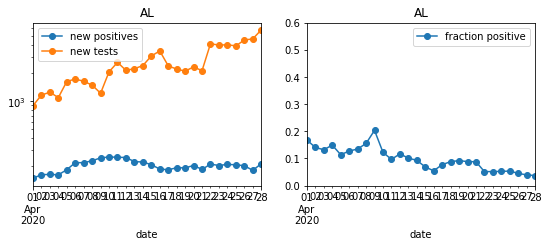

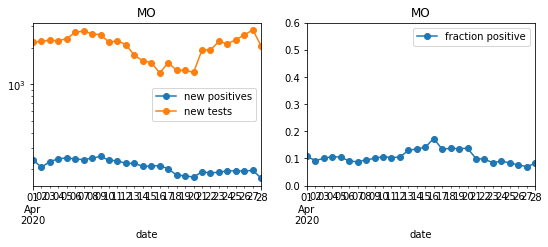

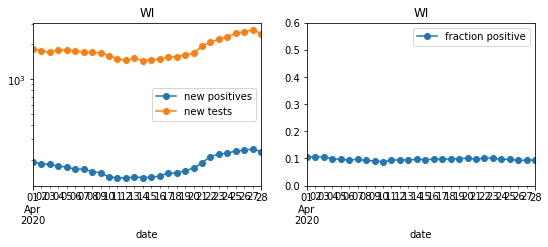

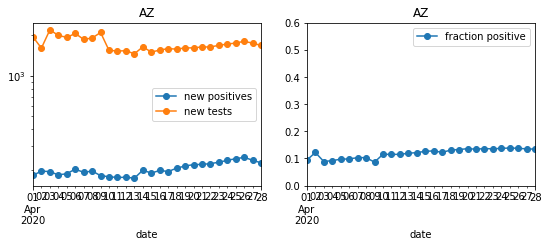

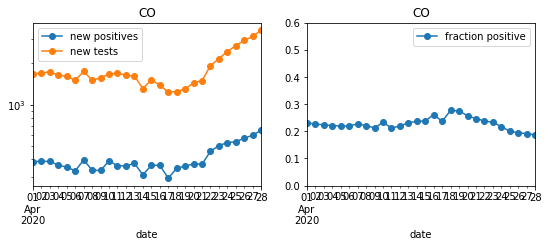

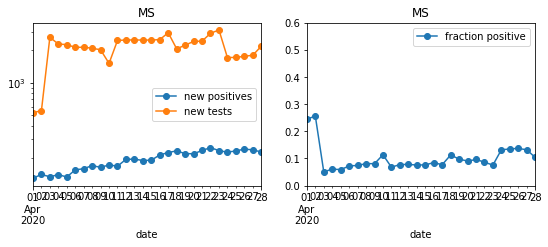

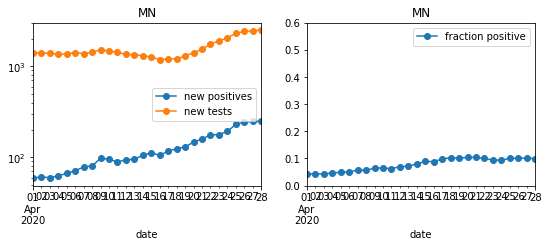

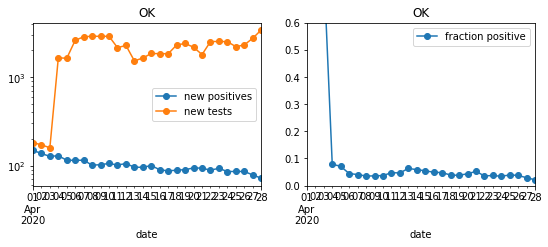

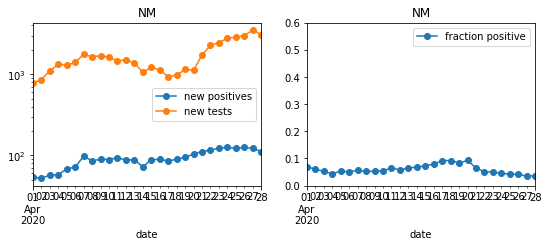

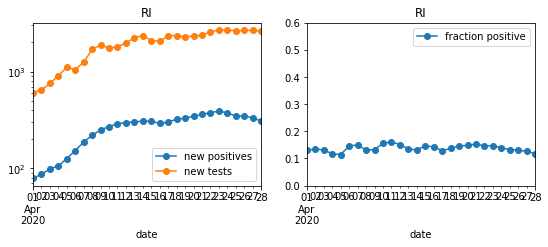

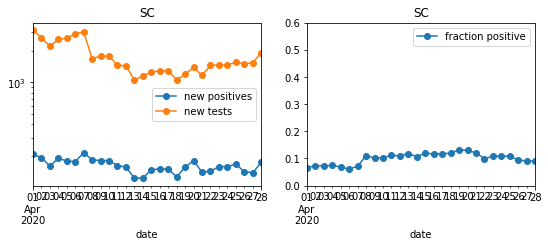

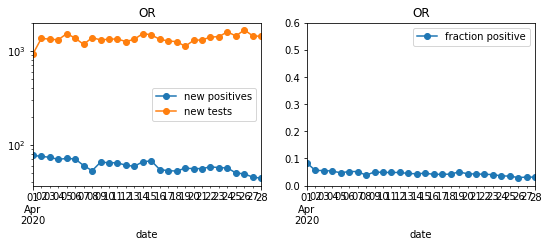

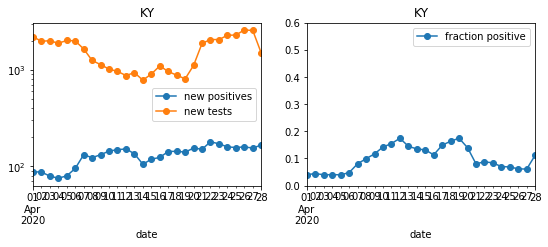

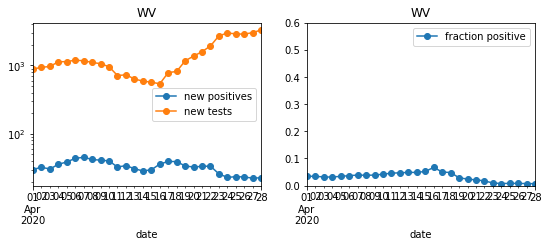

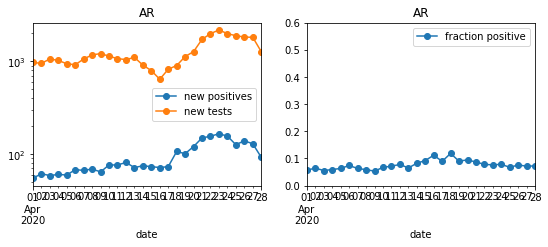

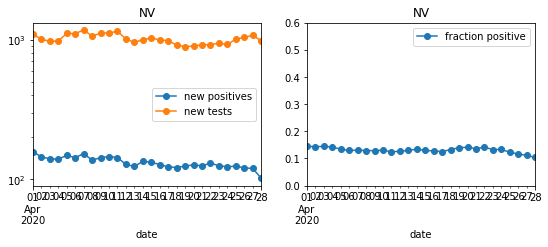

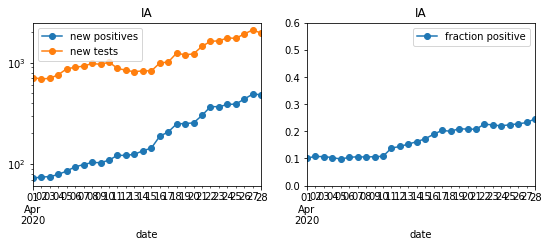

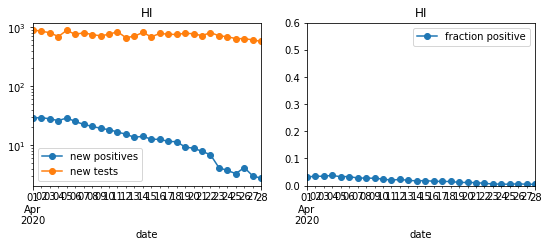

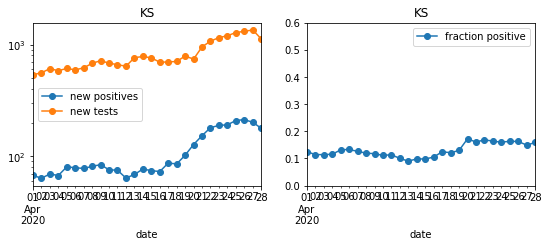

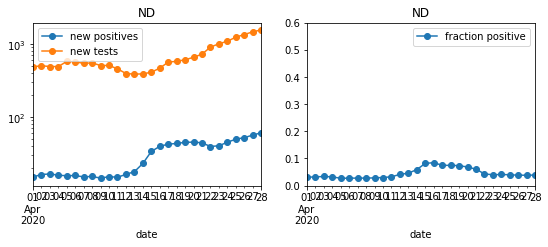

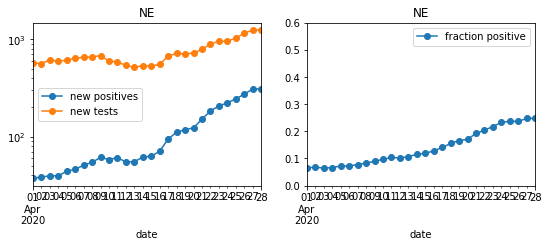

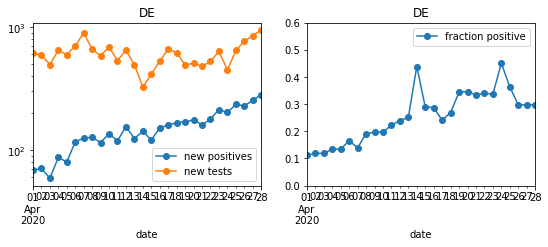

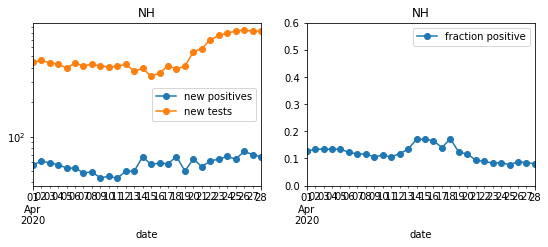

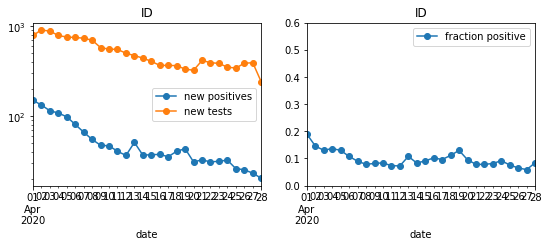

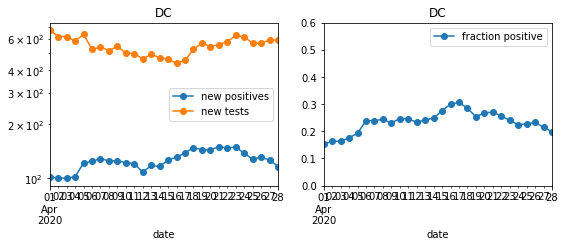

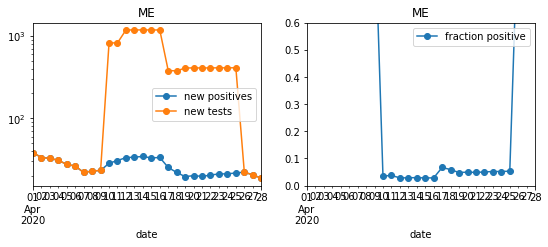

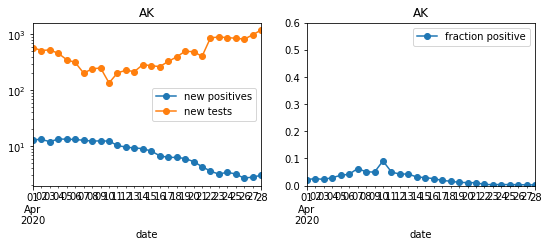

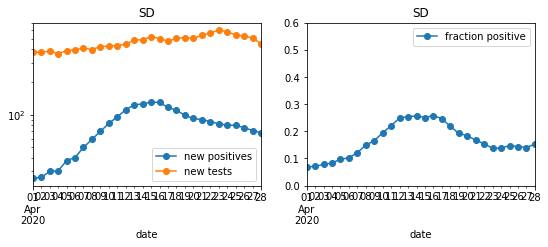

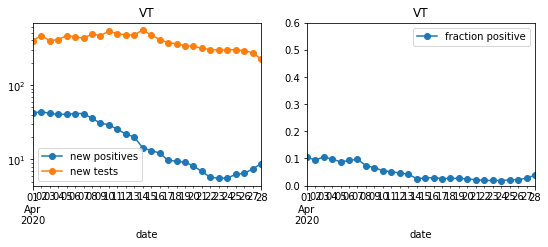

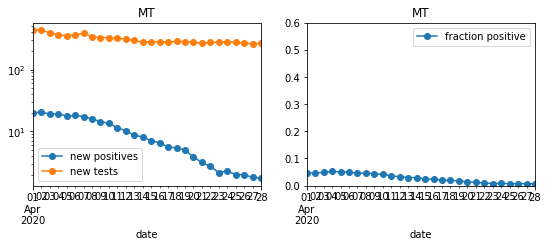

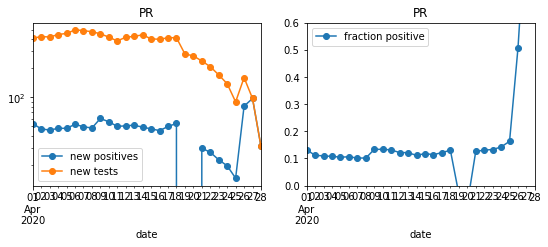

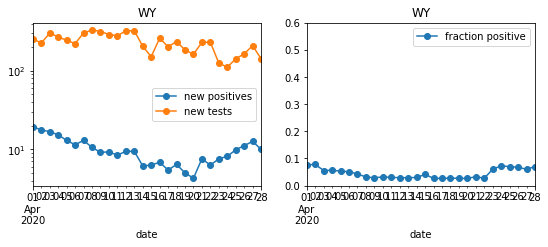

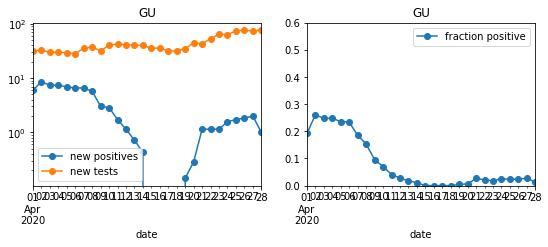

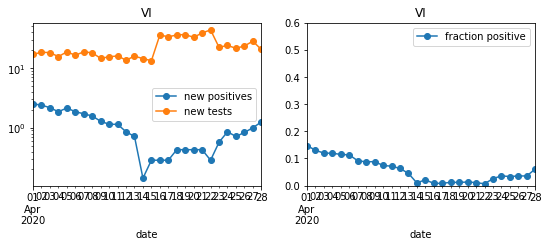

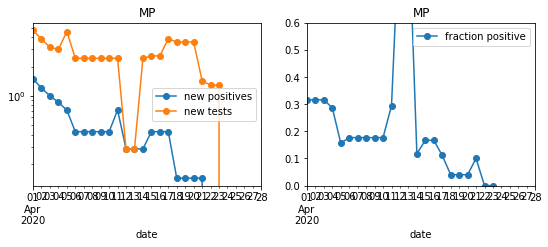

/Users/sheldon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


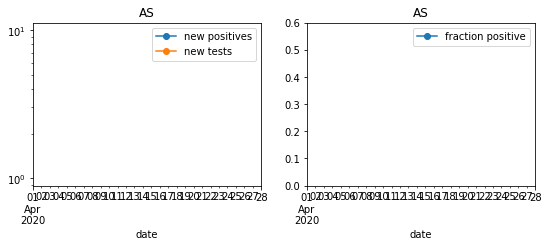

In [2]:
start = pd.to_datetime('2020-04-01')
US = covidtracking.load_us()

totals = [US[state]['total'].iloc[-1] for state in US.columns.unique(level=0)]
order = np.argsort(totals)[::-1]
states = US.columns.unique(level=0)

for i in order:
    state = states[i]    
    fig, ax = plt.subplots(figsize=(9,3), ncols=2)

    s = US[state][start:]  
    daily_pos = s['positiveIncrease'].rolling(7, min_periods=1, center=True).mean()
    daily_tot = s['totalTestResultsIncrease'].rolling(7, min_periods=1, center=True).mean()
    
    df = pd.DataFrame(index=s.index,
                      data = {'new positives': daily_pos,
                              'new tests': daily_tot,
                              'fraction positive': daily_pos/daily_tot})
    
    df.plot(ax=ax[0], y=['new positives', 'new tests'], style='-o')
    ax[0].set_yscale('log')

    df.plot(ax=ax[1], y=['fraction positive'], style='-o')    
    ax[1].set_ylim([0, 0.6])
    
    ax[0].set_title(state)
    ax[1].set_title(state)

    
    #plt.tight_layout()
    plt.show()